* Opencv >= 3
* numpy
* scikit-image
* matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.1.1'

# Histogram

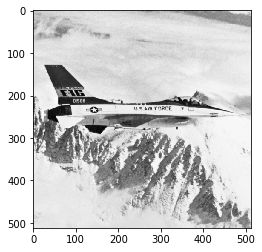

In [3]:
# Load gray scale image 
jet_plane_gray = cv2.imread("images/jetplane.tiff",0)
plt.imshow(jet_plane_gray,cmap='gray')
plt.show()

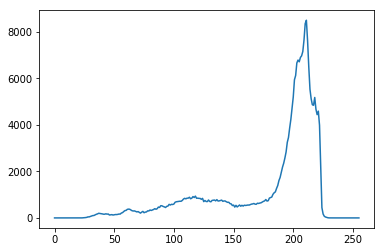

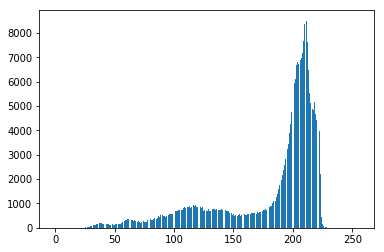

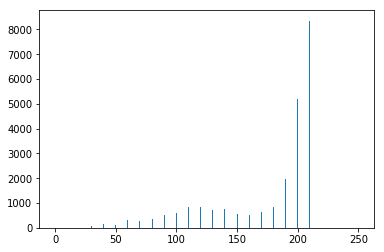

In [4]:
# cv2.calcHist(images, chanels <[0] for gray scale>, mask, bins, ranges)
jet_hist = cv2.calcHist([jet_plane_gray],[0],None,[256],[0,256])
plt.plot(jet_hist)
plt.show()

# Bar graph
plt.bar(range(256),jet_hist[:,0])
plt.show()

jet_hist_bar = jet_hist[::10]
x_vals = range(0,256,10)
plt.bar(x_vals,jet_hist_bar[:,0])
plt.show()


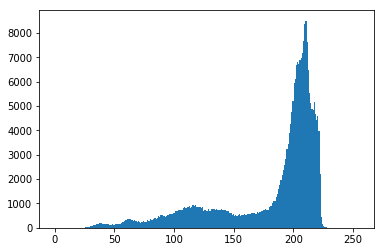

In [5]:
plt.hist(jet_plane_gray.ravel(),bins=256,range=[0,255])
plt.show()

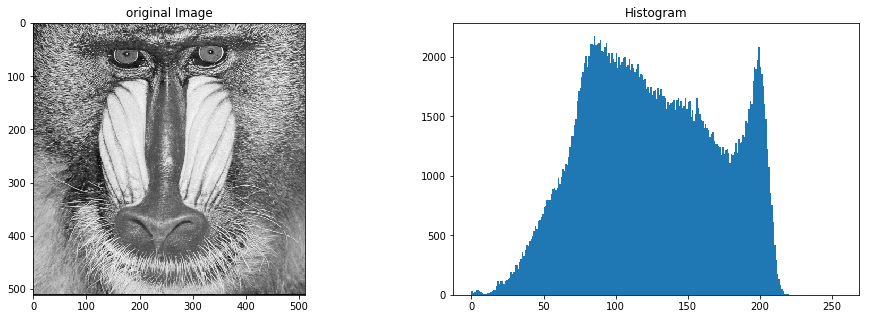

In [6]:
I1 = cv2.imread("images/mandril.tiff",0)
f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(I1,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].hist(I1.ravel(),bins=256,range=[0,256])
subplt[1].set_title("Histogram")
plt.show()

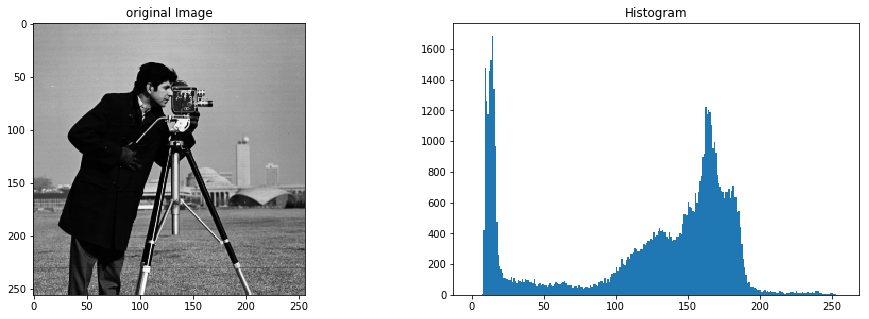

In [7]:
I1 = cv2.imread("images/cameraman.tif",0)
f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(I1,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].hist(I1.ravel(),bins=256,range=[0,256])
subplt[1].set_title("Histogram")
plt.show()

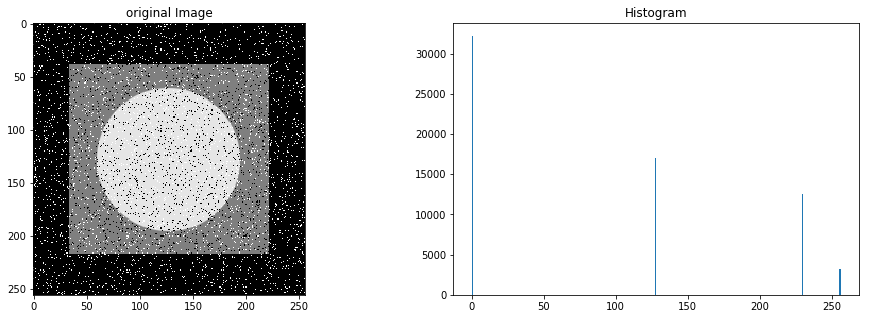

In [8]:
I1 = cv2.imread("images/Fig0504(i)(salt-pepper-noise).tif",0)
f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(I1,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].hist(I1.ravel(),bins=256,range=[0,256])
subplt[1].set_title("Histogram")
plt.show()

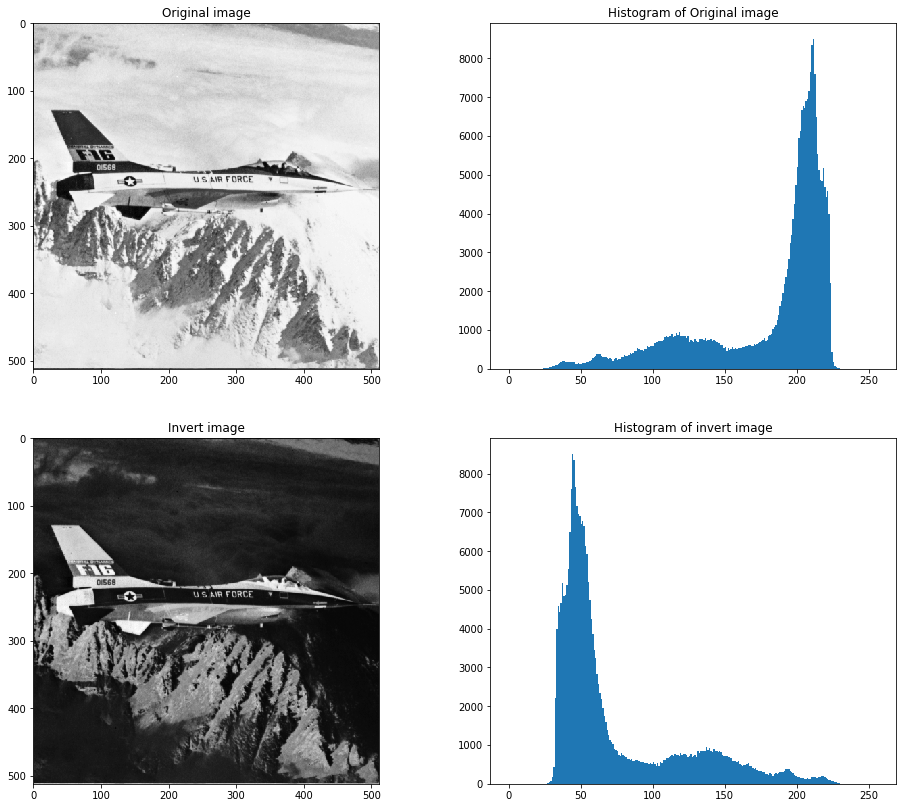

In [9]:
jet = cv2.imread("images/jetplane.tiff",0)
jet_inv = np.invert(jet)

f, subplt = plt.subplots(2,2,figsize=(16,14))
subplt[0,0].imshow(jet,cmap='gray')
subplt[0,0].set_title("Original image")

subplt[0,1].hist(jet.ravel(),bins=256,range=[0,256])
subplt[0,1].set_title("Histogram of Original image")

subplt[1,0].imshow(jet_inv,cmap='gray')
subplt[1,0].set_title("Invert image")

subplt[1,1].hist(jet_inv.ravel(),bins=256,range=[0,256])
subplt[1,1].set_title("Histogram of invert image")
plt.show()

## [Image adjust](https://scikit-image.org/docs/dev/api/skimage.exposure.html)

In [10]:
import skimage.exposure

In [11]:
camera_man = cv2.imread("images/cameraman.tif",0)
# convert image to an image in range 0 to 1
# camera_man = imadjust(camera_man,0,255,0,1)
print(camera_man.min()," : ",camera_man.max())
J = skimage.exposure.rescale_intensity(1.0*camera_man)
print(J.min()," : ",J.max())
J = skimage.exposure.rescale_intensity(J, in_range=(0,0.2),out_range=(0.5,1))
print(J.min()," : ",J.max())

7  :  253
0.0  :  1.0
0.5  :  1.0


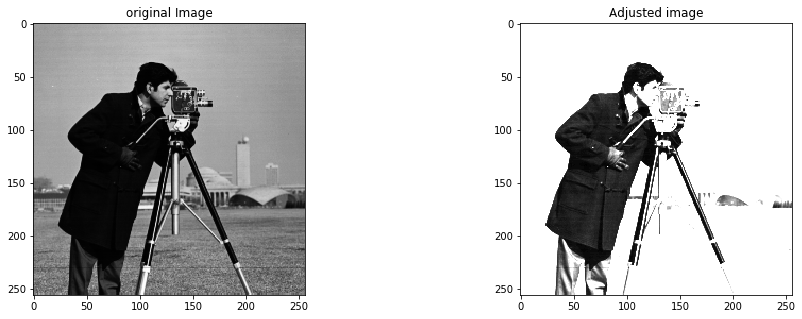

In [12]:
f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(J,cmap='gray')
subplt[1].set_title("Adjusted image")
plt.show()

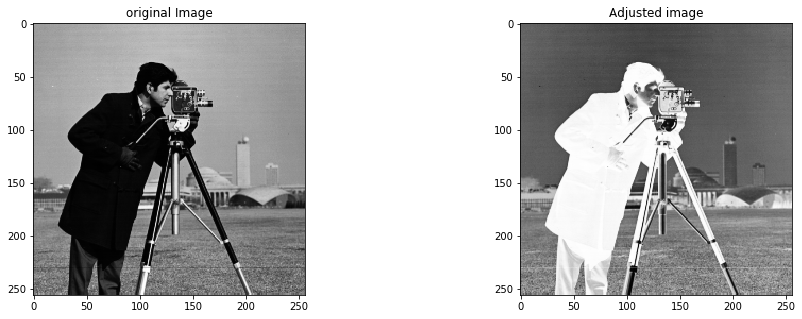

In [13]:
J = skimage.exposure.rescale_intensity(1.0*camera_man)
J = skimage.exposure.rescale_intensity(J, in_range=(0,1),out_range=(1,0))

f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(J,cmap='gray')
subplt[1].set_title("Adjusted image")
plt.show()

In [14]:
from skimage import data, img_as_float

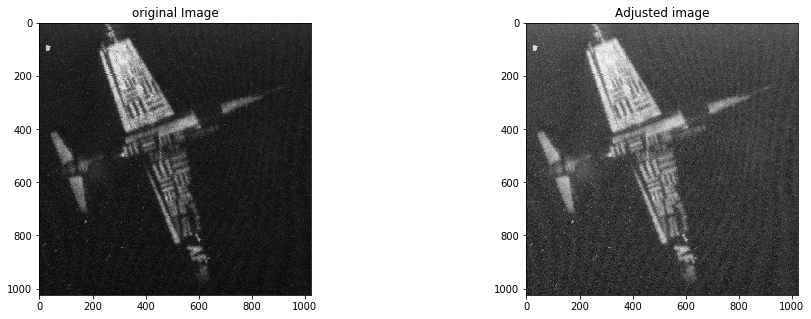

In [15]:
plane = cv2.imread("images/Airplane.tiff",0)
plane = img_as_float(plane)
J = skimage.exposure.adjust_gamma(plane,0.5)

f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(plane,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(J,cmap='gray')
subplt[1].set_title("Adjusted image")
plt.show()

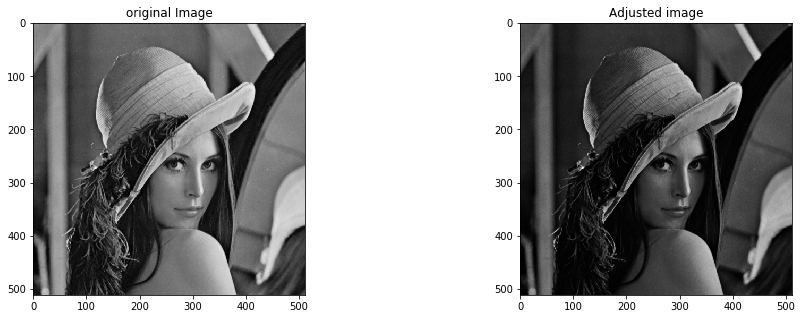

In [16]:
lena = cv2.imread("images/lena.tif",0)
lena = img_as_float(lena)
J = skimage.exposure.adjust_gamma(lena,2)

f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(lena,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(J,cmap='gray')
subplt[1].set_title("Adjusted image")
plt.show()

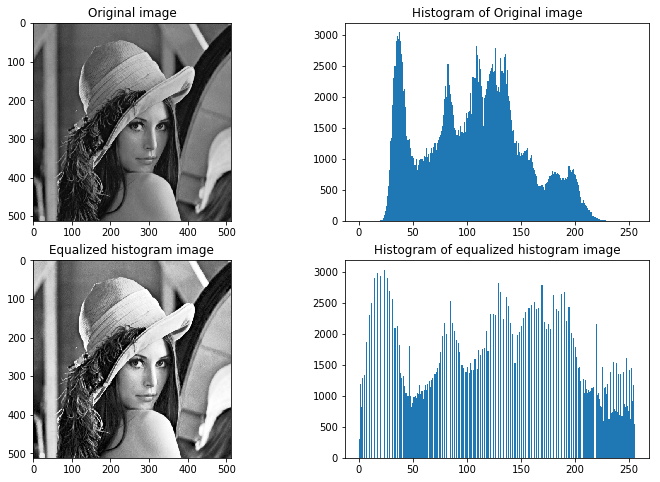

In [31]:
lena = cv2.imread("images/lena.tif",0)
lena_equal_hist = cv2.equalizeHist(lena)
# Use skimage.exposure.equalize_hist to specify different bins

f, subplt = plt.subplots(2,2,figsize=(12,8))
subplt[0,0].imshow(lena,cmap='gray')
subplt[0,0].set_title("Original image")

subplt[0,1].hist(lena.ravel(),bins=256,range=[0,256])
subplt[0,1].set_title("Histogram of Original image")

subplt[1,0].imshow(lena_equal_hist,cmap='gray')
subplt[1,0].set_title("Equalized histogram image")

subplt[1,1].hist(lena_equal_hist.ravel(),bins=256,range=[0,256])
subplt[1,1].set_title("Histogram of equalized histogram image")
plt.show()

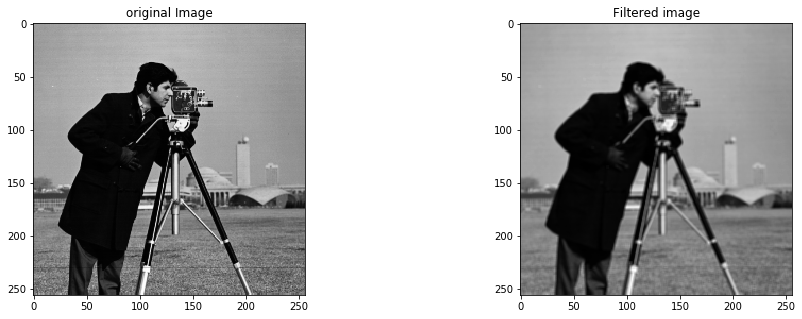

In [18]:
camera_man = cv2.imread("images/cameraman.tif",0)
kernel = np.ones((3,3),dtype=np.float32)/9
camera_man_avg = cv2.filter2D(camera_man,-1,kernel)
f, subplt = plt.subplots(1,2,figsize=(16,5))

subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(camera_man_avg,cmap='gray')
subplt[1].set_title("Filtered image")
plt.show()

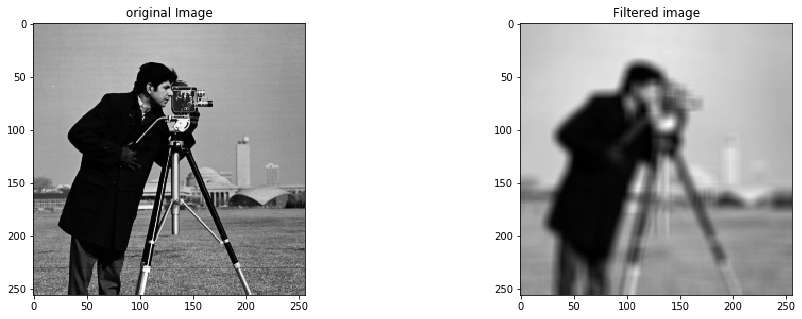

In [19]:
camera_man = cv2.imread("images/cameraman.tif",0)
kernel = np.ones((11,11),dtype=np.float32)/121
camera_man_avg = cv2.filter2D(camera_man,-1,kernel)
f, subplt = plt.subplots(1,2,figsize=(16,5))

subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("original Image")
subplt[1].imshow(camera_man_avg,cmap='gray')
subplt[1].set_title("Filtered image")
plt.show()

In [20]:
from skimage import data, img_as_float
from skimage.util import random_noise

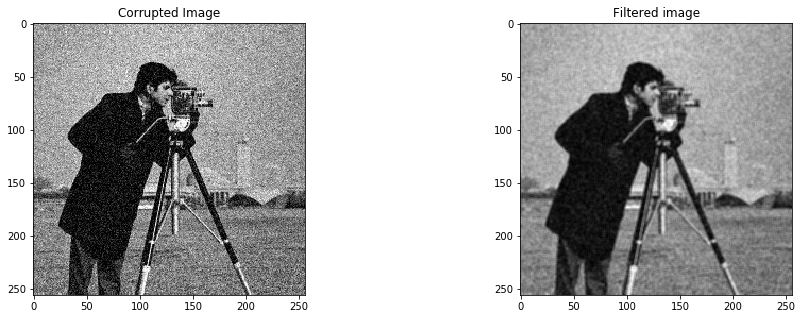

In [21]:
camera_man = img_as_float(cv2.imread("images/cameraman.tif",0))
sigma = 0.1
camera_man = random_noise(camera_man,mode='gaussian',var=sigma**2,mean=0)

kernel = np.ones((3,3),dtype=np.float32)/9
camera_man_avg = cv2.filter2D(camera_man,-1,kernel)
f, subplt = plt.subplots(1,2,figsize=(16,5))

subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("Corrupted Image")
subplt[1].imshow(camera_man_avg,cmap='gray')
subplt[1].set_title("Filtered image")
plt.show()

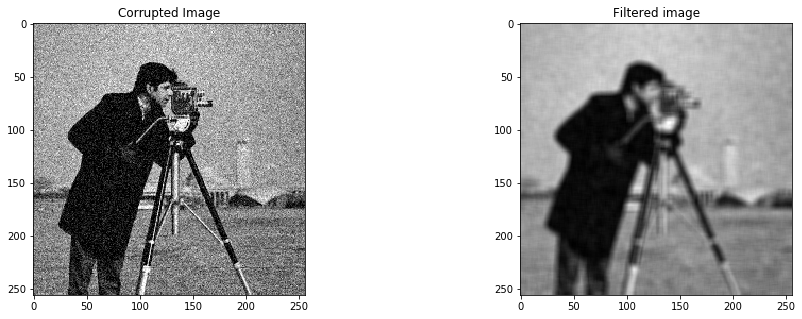

In [22]:
camera_man = img_as_float(cv2.imread("images/cameraman.tif",0))
sigma = 0.1
camera_man = random_noise(camera_man,mode='gaussian',var=sigma**2,mean=0)

kernel = np.ones((7,7),dtype=np.float32)/49
camera_man_avg = cv2.filter2D(camera_man,-1,kernel)
f, subplt = plt.subplots(1,2,figsize=(16,5))

subplt[0].imshow(camera_man,cmap='gray')
subplt[0].set_title("Corrupted Image")
subplt[1].imshow(camera_man_avg,cmap='gray')
subplt[1].set_title("Filtered image")
plt.show()

## [Scikit image filters](https://scikit-image.org/docs/dev/api/skimage.filters.html)

In [23]:
from skimage.morphology import disk
from skimage.filters import median

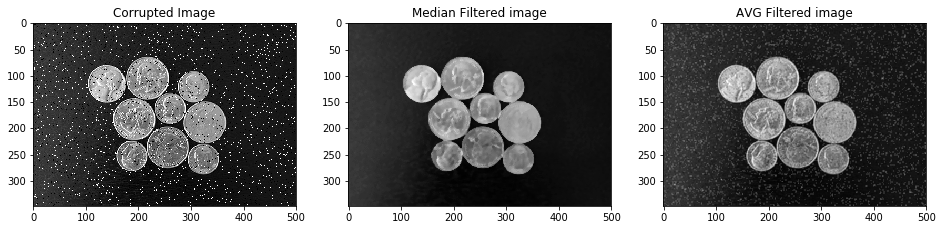

In [26]:
coins = img_as_float(cv2.imread("images/coines.jpg",0))

coins = random_noise(coins,mode='s&p')

kernel = np.ones((3,3),dtype=np.float32)/49
coins_avg1 = cv2.filter2D(coins,-1,kernel)
skimage_coins_mid = median(coins, disk(3))

f, subplt = plt.subplots(1,3,figsize=(16,5))
subplt[0].imshow(coins,cmap='gray')
subplt[0].set_title("Corrupted Image")
subplt[1].imshow(skimage_coins_mid,cmap='gray')
subplt[1].set_title("Median Filtered image")
subplt[2].imshow(coins_avg1,cmap='gray')
subplt[2].set_title("AVG Filtered image")
plt.show()

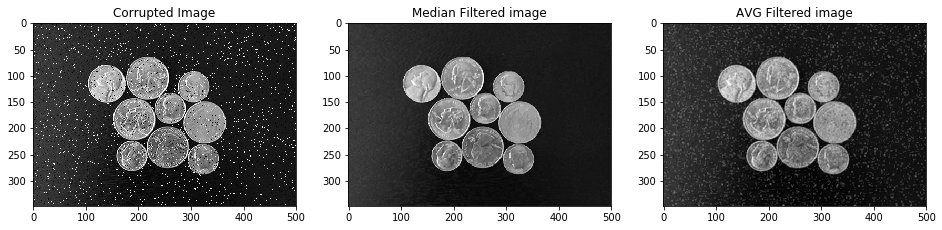

In [28]:
coins = img_as_float(cv2.imread("images/coines.jpg",0))
coins = random_noise(coins,mode='s&p')
coins = np.uint8(255*coins)

kernel = np.ones((3,3),dtype=np.float32)/49
coins_avg2 = cv2.filter2D(coins,-1,kernel)
opencv_coins_mid = cv2.medianBlur(coins,3)

f, subplt = plt.subplots(1,3,figsize=(16,5))
subplt[0].imshow(coins,cmap='gray')
subplt[0].set_title("Corrupted Image")
subplt[1].imshow(opencv_coins_mid,cmap='gray')
subplt[1].set_title("Median Filtered image")
subplt[2].imshow(coins_avg2,cmap='gray')
subplt[2].set_title("AVG Filtered image")
plt.show()

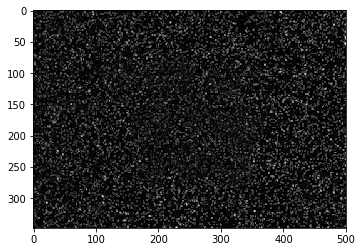

In [29]:
coins_avg1=np.uint8(255*coins_avg1)
plt.imshow(cv2.absdiff(coins_avg1,coins_avg2),cmap='gray')
plt.show()

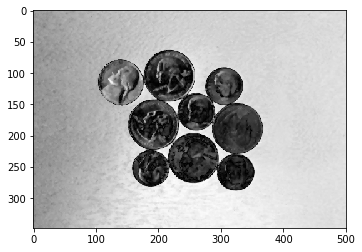

In [30]:
skimage_coins_mid=np.uint8(255*skimage_coins_mid)
plt.imshow(cv2.absdiff(skimage_coins_mid,opencv_coins_mid),cmap='gray')
plt.show()